1. Numerically simulate a Rayleigh multipath channel. Choose a transmitter location $(x_t, y_t)$, an array of locations $[x_r(t_m), y_r(t_m)]$ modeling a moving receiver, and random coordinates $(x_n, y_n)$ for Ns scatterers. The receiver should at least be a few wavelengths in total and a fraction of a wavelength in each time step. Model the electric field intensity at the receiver using $ E = \sum_{n=1}^{N_s} R_n e^{−jkr_n} /r_n$, where $R_n$ is a reflection coefficient and $r_n$ is the total path distance from the transmitter to the nth scatterer and then to the receiver. For a simple channel model, $R_n = 1$, or the reflection coefficient can be uniformly distributed with magnitude between zero and one.

(a) Plot the time history of the received power on a dB scale

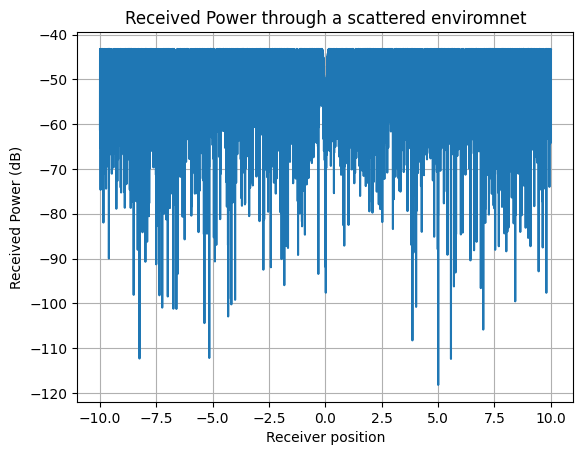

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# variables
points = 10000
bins = 200

# parameters
f = 1e9
c0 = 3e8
lam = c0/f
k = 2*np.pi/lam
eta = 377
Gr = 10**(1/10)

# transmitter location
x_t = 0
y_t = 0

# locations for receiver
x_r = np.linspace(-10, 10, points)
y_r = np.zeros(points)

# scatter points
x_s = np.random.uniform(-10, 10, points)
y_s = np.random.uniform(-10, 10, points)

# receiver model
E = np.zeros(points, dtype=complex)
ref_coef = -1
for m in range(0,points):
    delta_r = np.sqrt((x_t-x_s[m])**2+(y_t-y_s[m])**2) - np.sqrt((x_s[m]-x_r[m])**2+(y_s[m]-y_r[m])**2)
    E[m] = 1+ref_coef*np.exp(-1j*k*delta_r)

# power received
S = np.abs(E)**2/(2*eta)
Prec = S*lam**2*Gr / (4*np.pi)

#plot the power
plt.plot(x_r, 10*np.log10(Prec))
plt.xlabel("Receiver position")
plt.ylabel("Received Power (dB)")
plt.title("Received Power through a scattered enviromnet")
plt.grid()


(b) Use the hist command to generate the PDF of the received field magnitude as the receiver moves along a line through the propagation environment. Convert the output of the histfunction to a PDF estimate by rescaling to integrate to one. Plot your simulated PDF overlaid with the expected PDF.

C:\Users\oblit\AppData\Local\Temp\ipykernel_15424\1493196019.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  X = np.random.normal(mean, variance, points)
C:\Users\oblit\AppData\Local\Temp\ipykernel_15424\1493196019.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  Y = np.random.normal(mean, variance, points)


Incident Field:  17918.011555474048


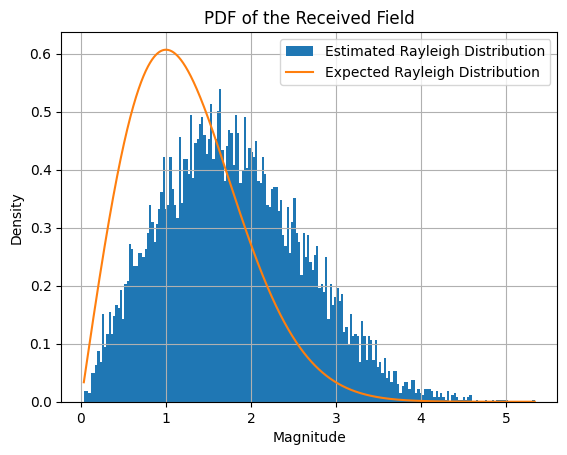

In [53]:
# gaussian case
mean = np.mean(E)
variance = np.var(E)
X = np.random.normal(mean, variance, points)
Y = np.random.normal(mean, variance, points)
Z = X + 1j*Y

# incident field calculation
E = np.sum(np.abs(Z))               # incident field at the receive 
print("Incident Field: ", E)        # print the incident field

# distance and angle
r = np.sqrt(X**2 + Y**2)
theta = np.arctan(Y/X)

# ideal Rayleigh plot
fr = r*np.exp(-r**2/(2*variance)) / (variance)

# plot
plt.figure()
plt.hist(np.abs(Z), bins, density=True, label="Estimated Rayleigh Distribution")
plt.plot(np.sort(r), fr[np.argsort(r)], label="Expected Rayleigh Distribution")
plt.title("PDF of the Received Field")
plt.legend()
plt.xlabel("Magnitude")
plt.ylabel("Density")
plt.grid()




(c) Create a similar plot for the received power or SNR with noise power equal to unity with your estimated PDF overlaid with the expected PDF. You can compute the variance parameter from the real or imaginary part of your received field samples

Mean SNR:  0.9996603457579589


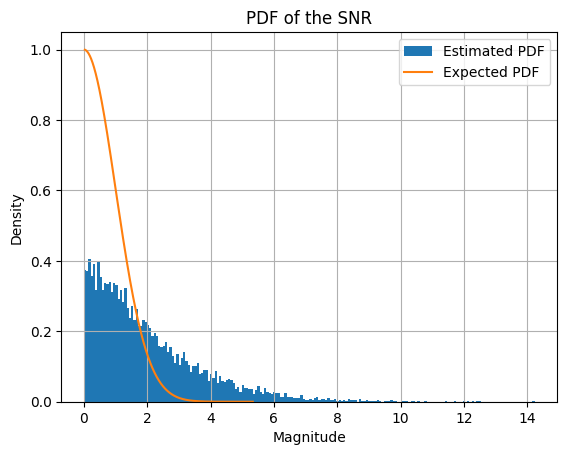

In [54]:
# local SNR
# kb = 1.38e-23           # boltzmann's constant
# Tsys = 290              # system noise temperature
# BW = 1e6                # signal badnwdith
# Pn = kb*Tsys*BW         # noise power
Pn = 1                  # noise power at unity
SNR_local = (r**2 / 2) / Pn   # local SNR

# mean SNR
SNR_mean = variance / Pn    # mean SNR
print("Mean SNR: ", SNR_mean)

# pdf of the SNR
SNR_pdf = (1/SNR_mean)*np.exp(-SNR_local/SNR_mean)

# plot PDF of the SNR
plt.figure()
plt.hist(SNR_local, bins, density=True, label="Estimated PDF")
plt.plot(np.sort(r), SNR_pdf[np.argsort(r)], label="Expected PDF")
plt.legend()
plt.xlabel("Magnitude")
plt.ylabel("Density")
plt.title("PDF of the SNR")
plt.grid()

2. Change the model from the previous problem to model a Ricean channel

C:\Users\oblit\AppData\Local\Temp\ipykernel_15424\3579080525.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  X = np.random.normal(mean, variance, points)
C:\Users\oblit\AppData\Local\Temp\ipykernel_15424\3579080525.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  Y = np.random.normal(mean, variance, points)


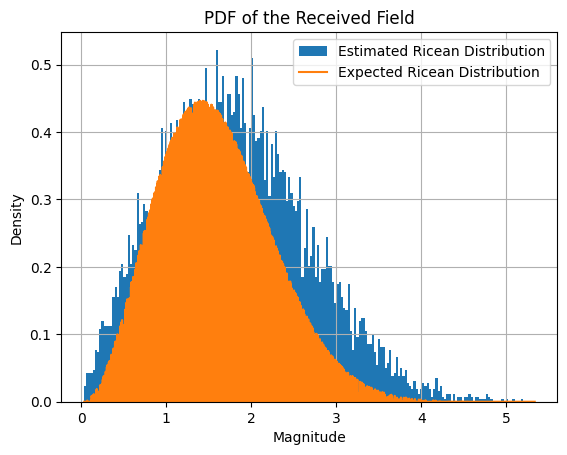

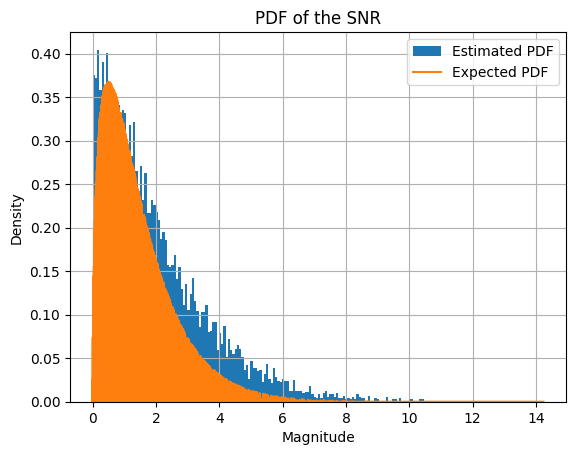

In [72]:

# recalculate OG E-Field
E = np.zeros(points, dtype=complex)
ref_coef = -1
for m in range(0,points):
    delta_r = np.sqrt((x_t-x_s[m])**2+(y_t-y_s[m])**2) - np.sqrt((x_s[m]-x_r[m])**2+(y_s[m]-y_r[m])**2)
    E[m] = 1+ref_coef*np.exp(-1j*k*delta_r)
mean = np.mean(E)
variance = np.var(E)
X = np.random.normal(mean, variance, points)
Y = np.random.normal(mean, variance, points)
Z = X + 1j*Y

# estimated ricean
r_s = np.sqrt((x_t-x_r)**2 + (y_t-y_r)**2)  # direct path
K = r_s**2 / (2*variance)                   # ricean constant
E = r_s + np.sum(Z)                         # New E-Field

# expected ricean
I0 = 1
rice_pdf = (2*K*r/r_s**2) * np.exp(-K*(r**2+r_s**2)/r_s**2) * I0 * (2*K*r/r_s)

# plot
plt.figure()
plt.hist(np.abs(Z), bins, density=True, label="Estimated Ricean Distribution")
plt.plot(np.sort(r), rice_pdf[np.argsort(r)], label="Expected Ricean Distribution")
plt.title("PDF of the Received Field")
plt.legend()
plt.xlabel("Magnitude")
plt.ylabel("Density")
plt.grid()

# estimated SNR
little_gamma = (r**2 / 2) / Pn

# expexted SNR
big_gamma = SNR_mean
f_gamma = (1/big_gamma)*np.exp(-(little_gamma/big_gamma+K))*I0*np.sqrt(4*K*little_gamma/big_gamma)

# plot PDF of the SNR
plt.figure()
plt.hist(little_gamma, bins, density=True, label="Estimated PDF")
plt.plot(np.sort(little_gamma), f_gamma[np.argsort(little_gamma)], label="Expected PDF")
plt.legend()
plt.xlabel("Magnitude")
plt.ylabel("Density")
plt.title("PDF of the SNR")
plt.grid()